## Bessel J0 UserModel.

We construct a UserModel implementing the Bessel function of the first kind, order 0: scipy.special.j0()

Demonstration:
1. UserModel
2. NestedSampler


In [1]:
import numpy as numpy
from scipy.special import j0
import math

from astropy.io import ascii

from BayesicFitting import UserModel
from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import Tools
import matplotlib.pyplot as plt


In [2]:
#%matplotlib osx
%matplotlib inline

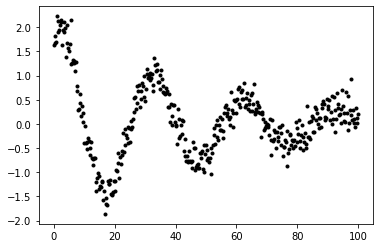

In [3]:
## Make some data. It looks like a Bessel function, but it is not.

npt = 401
t = numpy.linspace( 0, 100, npt, dtype=float )
ym = 2 * numpy.sin( 2 * math.pi * ( t / 30 ) + 1 ) * numpy.exp( -0.02 * t )
y = numpy.random.seed( 12345 )
y = ym + numpy.random.randn( npt ) * 0.2
plt.plot( t, y, 'k.' )
plt.show()

In [4]:
## Define a parameterized version of the Bessel function j0.
def bessel_result( x, p ):
    xx = ( x - p[1] ) / p[2]
    return p[0] * j0( xx )

## We do not have partials or derivatives; so we get warnings.
model = UserModel( 3, bessel_result, userName="Bessel J0" )
model.setLimits( [-10, -2, 0], [10,10,10] ) 

/Users/do/PYTHON/Master/BayesicFitting/BayesicFitting/source/UserModel.py:143: UserWarning: Using numeric approximations for userPartial
  warnings.warn( "Using numeric approximations for %s" % name )
/Users/do/PYTHON/Master/BayesicFitting/BayesicFitting/source/UserModel.py:143: UserWarning: Using numeric approximations for userDerivative
  warnings.warn( "Using numeric approximations for %s" % name )


Fit all parameters of
  UserModel( Bessel J0 )
Using a Gauss error distribution with unknown scale
Moving the walkers with   ChordEngine  StepEngine
Iteration     logZ        H       LowL     npar parameters                   scale
       0  -1.93e+07      4.6  -1.93e+07      4  [   -9.593    2.653    6.077    0.012]


     100  -1.84e+04      5.6  -1.84e+04      4  [    7.557   -0.240    5.592    0.209]
     200  -1.76e+03      6.6  -1.75e+03      4  [   -2.408    2.833    3.651    0.473]


     300      -726.      7.0      -719.      4  [    4.239    1.439    5.191    0.662]


     400      -503.      7.5      -495.      4  [   -0.456    8.738    3.998    0.879]


     500      -454.      7.9      -446.      4  [    2.358    5.428    2.562    0.579]


     600      -404.      9.4      -394.      4  [    1.101    5.614    3.045    0.708]


     700      -317.     10.0      -307.      4  [    1.581    1.693    4.175    0.675]
     800      -232.     11.4      -220.      4  [    2.435   -1.566    4.482    0.404]


     900      -167.     12.7      -154.      4  [    2.299   -1.661    4.618    0.281]


    1000      -126.     12.4      -112.      4  [    1.951    0.221    4.611    0.317]


    1100      -95.1     13.0      -81.5      4  [    2.514   -0.298    4.592    0.328]


    1200      -74.7     13.7      -60.1      4  [    2.876   -1.234    4.698    0.271]


    1300      -59.0     14.3      -43.8      4  [    2.576   -1.128    4.845    0.288]


    1400      -50.0     14.7      -34.3      4  [    2.540   -1.485    4.855    0.287]


    1500      -45.5     15.2      -29.2      4  [    2.556   -1.262    4.782    0.238]


    1600      -43.1     15.3      -26.7      4  [    2.718   -1.658    4.790    0.258]


    1700      -42.0     15.5      -25.2      4  [    2.649   -1.810    4.818    0.256]


    1800      -41.4     15.7      -24.3      4  [    2.719   -1.841    4.854    0.252]


    1900      -41.1     15.8      -23.8      4  [    2.661   -1.716    4.825    0.267]


    2000      -41.0     15.9      -23.5      4  [    2.695   -1.754    4.830    0.262]


    2100      -40.9     15.9      -23.2      4  [    2.694   -1.696    4.828    0.252]


    2200      -40.9     16.0      -23.1      4  [    2.693   -1.707    4.831    0.257]


    2300      -40.9     16.0      -23.0      4  [    2.653   -1.662    4.827    0.254]


    2400      -40.9     16.0      -23.0      4  [    2.675   -1.699    4.827    0.257]


    2500      -40.9     16.0      -23.0      4  [    2.667   -1.674    4.829    0.257]
    2534      -40.9     16.0      -23.0      4 
Parameters   [    2.666   -1.645    4.823    0.257]
Engines              success     reject     failed       best      calls
ChordEngine            18397      22178          0          0       2634
StepEngine             12869      22548         97          0       2634
Calls to LogL          76089
Samples        2634
Evidence       -17.765 +-      0.174


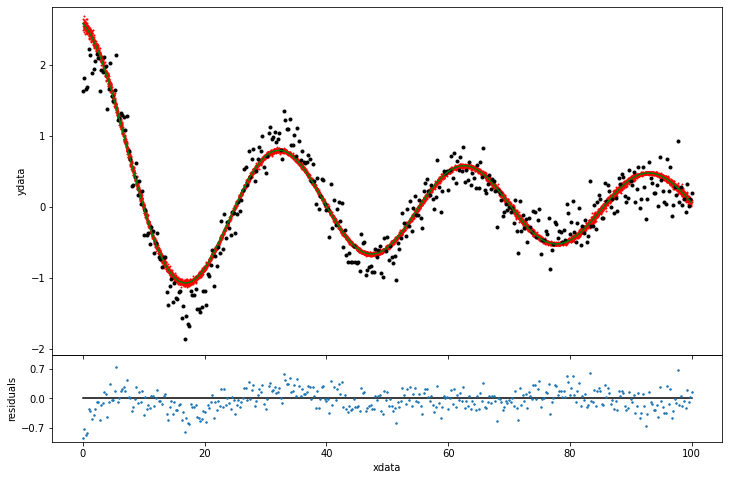

In [5]:
## Use engines that do not use partial derivatives.
engs = ["chord", "step"]
ns = NestedSampler( t, model, y, engines=engs )
ns.distribution.setLimits( [0.01, 1] )
ns.verbose = 2
evi = ns.sample( plot=True )

In [6]:
sl = ns.samples
kmed = sl.getMedianIndex()
smpl = sl[kmed]
print( fmt( smpl.model.parameters, max=None ) )
print( fmt( sl[-1].model.parameters, max=None ) )

[    2.665   -1.630    4.821]
[    2.665   -1.630    4.821]
